# Sentiment Analysis on the Berlin State Library Catalog and Amazon

## Motivation
* In this tutorial, you will learn how to read from a unstructured and structured dataset, create a dataframe from this raw data, and to visualize characteristics from the data in order to find out whether the titles of a research library are truly neutral from a sentiment analysis perspective and how they compare to a sample from books sold by Amazon.

* The sentiment analysis is based on two libraries: [TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis) and [VADER](https://github.com/cjhutto/vaderSentiment) as part of [NLTK](https://www.nltk.org/).

* You will learn to compare the results of both libraries.


### Preparations and Prerequisities
* This tutorial works on data created by the processPicaPlus script being part of the [StabiHacks](https://github.com/elektrobohemian/StabiHacks). For the sake of simplicity a basic data set is included.

* You should have a basic understanding of Python and pandas dataframe structure.

* We further assume that you already know how to install missing libraries with the help of pip or conda. However, we give advice on how to install some most likely missing libraries and corpora.

In [2]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
# we will need fairly wide columns to display all text
pd.set_option('max_colwidth', 250)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set(font_scale=1.5)

import csv
from textblob import TextBlob


Most likely, [TextBlobDE](https://github.com/markuskiller/textblob-de) will not be installed on your machine. The next two cells will setup the package and download possible missing corpora.

In [3]:
!pip install -U textblob-de

Requirement already up-to-date: textblob-de in /anaconda3/lib/python3.6/site-packages (0.4.3)


In [4]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/david/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/david/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/david/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/david/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/david/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [5]:
from textblob_de import TextBlobDE

## Dataset Preparation I - The Berlin State Library Catalog

The next cell takes the output from the processPicaPlus script and loads it into a dataframe.

Depending on the size of the input file, the following creation of the dataframe for further analyzes will take some time.

In [6]:
# create a dictionary for the records
values={"ppn":[],"title":[],"sentiment_polarity":[],"sentiment_subjectivity":[]}
with open('./data/eng_out.txt.secret', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t')
    for row in spamreader:
        # skip empty separator line
        if row:
            if not ppn:
                ppn=row[0]
            # check if we deal with a row containing a title
            if row[1]=="021A":
                # create a TextBlob from the medium's title
                title=TextBlob(row[2])
                values["ppn"].append(ppn)
                values["title"].append(row[2])
                # add the sentiment analysis results to the dataframe
                values["sentiment_polarity"].append(title.sentiment.polarity)
                values["sentiment_subjectivity"].append(title.sentiment.subjectivity)
        else:
            ppn=None
df=pd.DataFrame(values)

In [7]:
df.head()

,ppn,title,sentiment_polarity,sentiment_subjectivity
0,0225904055,Publications of the Clark University Library,0.0,0.000
1,033174418X,APMIS,0.0,0.000
2,0374601534,Developments in Central and East European politics,0.0,0.125
3,0364441704,The Phoenix Award of the Children's Literature Association,0.0,0.000
4,0193162784,Couch on insurance 3d,0.0,0.000


## Analysis

In the next step, you will visualise the distribution of the sentiment polarity and its subjectivity. The sentiment polarity is a score in the range [-1,1] that indicates whether a title's sentiment is negative or positive.

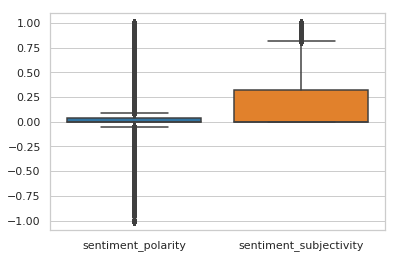

In [8]:
sns.boxplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19e1d080>,
      dtype=object)

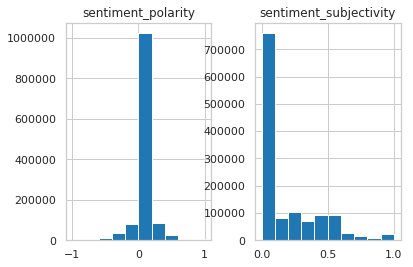

In [9]:
df.hist()

## Dataset Preparation II - The Amazon Books Dataset

The following book dataset can be obtained [here](https://github.com/uchidalab/book-dataset).

As the dataset comes in the structured CSV format, its loading is pretty straight-forward.

In [10]:
df2=pd.read_csv("./data/book32-listing.csv",header=None)
df2.head()

,0,1,2,3,4,5,6
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdHJbL.jpg,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw9BL.jpg,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
2,B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqsFUL.jpg,"Moleskine 2016 Weekly Notebook, 12M, Large, Black, Soft Cover (5 x 8.25)",Moleskine,3,Calendars
3,761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJqjL.jpg,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
4,1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq6xL.jpg,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


In [11]:
df2[6].unique()

array(['Calendars', 'Comics & Graphic Novels', 'Test Preparation',
       'Mystery, Thriller & Suspense', 'Science Fiction & Fantasy',
       'Romance', 'Humor & Entertainment', 'Literature & Fiction',
       'Gay & Lesbian', 'Engineering & Transportation',
       'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home',
       'Arts & Photography', 'Education & Teaching',
       'Parenting & Relationships', 'Self-Help', 'Computers & Technology',
       'Medical Books', 'Science & Math', 'Health, Fitness & Dieting',
       'Business & Money', 'Law', 'Biographies & Memoirs', 'History',
       'Politics & Social Sciences', 'Reference',
       'Christian Books & Bibles', 'Religion & Spirituality',
       'Sports & Outdoors', 'Teen & Young Adult', "Children's Books",
       'Travel'], dtype=object)

As above, we will add the results of the sentiment analysis to the recently read dataframe. Additionally, we will drop all columns of the dataframe we are no longer interested in. This is always a good idea as it saves memory.

In [12]:
def getSentimentPolarity(data):
    txt=TextBlob(data)
    return txt.sentiment.polarity

def getSentimentSubjectivity(data):
    txt=TextBlob(data)
    return txt.sentiment.subjectivity

df2['sentiment_polarity'] = df2[3].apply(getSentimentPolarity)
df2['sentiment_subjectivity'] = df2[3].apply(getSentimentSubjectivity)

df2=df2.drop([1,2,4,5,6], axis=1)
df2.head()

,0,3,sentiment_polarity,sentiment_subjectivity
0,761183272,Mom's Family Wall Calendar 2016,0.000000,0.000000
1,1623439671,Doug the Pug 2016 Wall Calendar,0.000000,0.000000
2,B00O80WC6I,"Moleskine 2016 Weekly Notebook, 12M, Large, Black, Soft Cover (5 x 8.25)",0.049206,0.403968
3,761182187,365 Cats Color Page-A-Day Calendar 2016,0.000000,0.000000
4,1578052084,Sierra Club Engagement Calendar 2016,0.000000,0.000000


## Analysis II

In [13]:
df2.shape

(207572, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4400e860>,
      dtype=object)

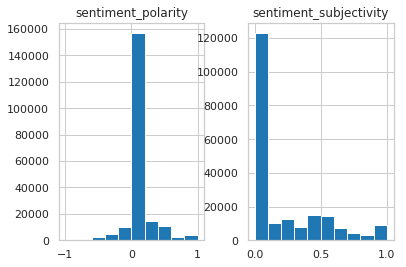

In [14]:
df2[["sentiment_polarity","sentiment_subjectivity"]].hist()

Because the Berlin State library dataset contains much more elements than the Amazon books dataset, we have to take a sample to facilitate comparison.

In [15]:
df3=df.sample(n=200000, random_state=1) # random_state=1 for reproducibility
df3.head()

,ppn,title,sentiment_polarity,sentiment_subjectivity
856834,0552390860,"Principles of politeness and of knowing the world, in two parts Containing every Instruction necessary to complete the Gentleman and Man of Fashion To teach him a Knowledge of Life, and make him well received in all Companies. for the improvement...",0.091667,0.533333
189716,0446541982,Notes on the Sthanakwasi or the non-idolatrous Shwetambar Jains,0.000000,0.000000
1115929,0792497716,Japanese popular culture in the twenty-first century,0.300000,0.450000
1074758,0424879433,Proceedings of public hearings: Plutonium and the other transuranium elements,-0.062500,0.220833
573264,060763314X,Bahāwalpur district map [Pakistan],0.000000,0.000000


In the next cell, we will plot the histograms of both datasets over each other to compare their similarity.

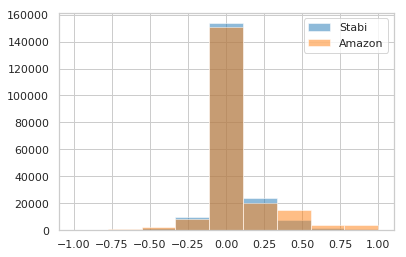

In [16]:
# create bins ranging from -1 to 1 in 10 steps
bins = np.linspace(-1, 1, 10)
# plot both histograms
plt.hist(df3["sentiment_polarity"],bins,alpha=0.5, label='Stabi')
plt.hist(df2["sentiment_polarity"],bins,alpha=0.5, label='Amazon')
plt.legend(loc='upper right')
plt.show()

Interestingly, most titles are neutral indicated by the amount of media in the neutral (0) bin. However, Amazon's media titles tend to be more positive than those of the Berlin State Library.

Let's take a look at the most positive titles from Amazon:

In [17]:
df2[(df2.sentiment_polarity==df2.sentiment_polarity.max())].head()

,0,3,sentiment_polarity,sentiment_subjectivity
30,761183728,Today Is Going to Be a Great Day! Color Page-A-Day Calendar 2016,1.0,0.75
109,1419716093,William Wegman Man's Best Friend 2016 Wall Calendar,1.0,0.30
738,3955704696,Sailing tall Boats (Wonderful World),1.0,1.00
759,3955704688,Regatta (Wonderful World),1.0,1.00
769,3955700984,Sailing Tall Boats 2014 (What a Wonderful World),1.0,1.00


What a wonderful world! Anyhow, Berlin State Library's titles form a new class of positive thinking..., see [Report of the committee appointed by the Highland Society of Scotland to consider what is the best mode of forming institutions of the nature of savings banks, for receiving the deposits of labourers and others](http://stabikat.de/DB=1/XMLPRS=N/PPN?PPN=554977389).

In [18]:
df3[(df3.sentiment_polarity==df3.sentiment_polarity.max())].head()

,ppn,title,sentiment_polarity,sentiment_subjectivity
503577,0558782485,The greatest [Muhammad Ali],1.0,1.0
688303,0554977389,"Report of the committee appointed by the Highland Society of Scotland to consider what is the best mode of forming institutions of the nature of savings banks, for receiving the deposits of labourers and others",1.0,0.3
564388,0555627349,A romance on three legs Glenn Gould's obsessive quest for the perfect piano,1.0,1.0
471510,0391442570,What friends do best,1.0,0.3
1194783,0880060115,The excellent vessel of ambrosia a commentary on the thirty-seven practices of bodhisattvas union of the root text and instructions,1.0,1.0


For the sake of completeness, we will also look at the most negative book titles.

In [19]:
df2[(df2.sentiment_polarity==df2.sentiment_polarity.min())].head()

,0,3,sentiment_polarity,sentiment_subjectivity
3993,61862975,Gris Grimly's Frankenstein,-1.0,1.0
5078,1421539896,"Naruto: 3-in-1 Edition, Vol. 1 (Uzumaki Naruto / The Worst Client / Dreams)",-1.0,1.0
5421,1401253385,Forever Evil,-1.0,1.0
5498,1770462147,The Owner's Manual to Terrible Parenting,-1.0,1.0
8571,316349933,Career of Evil (Cormoran Strike),-1.0,1.0


In [20]:
df3[(df3.sentiment_polarity==df3.sentiment_polarity.min())].head()

,ppn,title,sentiment_polarity,sentiment_subjectivity
1207300,0725013540,"A Poem on Jason Fairbanks who is to be executed this day (Sept. 10) in Dedham, for the shocking murder of Miss Elizabeth Fales, which was committed in that town, on the 18th day of May, 1801",-1.0,1.0
310779,0327634820,Saddam's bombmaker the terrifying inside story of Iraqi nuclear and biological weapons agenda,-1.0,1.0
765143,0554752662,"A vvarning to all teachers of children, which are called school-masters and school-mistresses and to parents, which doth send their children to be taught by them that all school-masters and school-mistresses may train up children in the fear of G...",-1.0,1.0
679298,0554114143,Sir Beniamin Rudierd his speech in behalfe of the clergie and of parishes miserably destitute of instruction through want of maintenance,-1.0,1.0
1116117,0739310305,What's the worst thing you can do to Shakespeare?,-1.0,1.0


## An Alternative Sentiment Analysis Using VADER
First, you will have to download the lexicon for [VADER](https://github.com/cjhutto/vaderSentiment), another sentiment analyzer with a focus on social media.

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/david/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

As above, we will create a function to calculate the sentiment polarity for each title. The _compound_ value is a aggregated score based on all negative, neutral, and positive terms in the title.

In [23]:
def getSentimentPolarityVADER(data):
    return sid.polarity_scores(data)['compound']

df2['sentiment_polarity_VADER'] = df2[3].apply(getSentimentPolarityVADER)
df2.head()

,0,3,sentiment_polarity,sentiment_subjectivity,sentiment_polarity_VADER
0,761183272,Mom's Family Wall Calendar 2016,0.000000,0.000000,0.0000
1,1623439671,Doug the Pug 2016 Wall Calendar,0.000000,0.000000,0.0000
2,B00O80WC6I,"Moleskine 2016 Weekly Notebook, 12M, Large, Black, Soft Cover (5 x 8.25)",0.049206,0.403968,0.0000
3,761182187,365 Cats Color Page-A-Day Calendar 2016,0.000000,0.000000,0.0000
4,1578052084,Sierra Club Engagement Calendar 2016,0.000000,0.000000,0.4588


In [24]:
df3['sentiment_polarity_VADER'] = df3["title"].apply(getSentimentPolarityVADER)
df3.head()

,ppn,title,sentiment_polarity,sentiment_subjectivity,sentiment_polarity_VADER
856834,0552390860,"Principles of politeness and of knowing the world, in two parts Containing every Instruction necessary to complete the Gentleman and Man of Fashion To teach him a Knowledge of Life, and make him well received in all Companies. for the improvement...",0.091667,0.533333,0.6249
189716,0446541982,Notes on the Sthanakwasi or the non-idolatrous Shwetambar Jains,0.000000,0.000000,0.0000
1115929,0792497716,Japanese popular culture in the twenty-first century,0.300000,0.450000,0.4215
1074758,0424879433,Proceedings of public hearings: Plutonium and the other transuranium elements,-0.062500,0.220833,0.0000
573264,060763314X,Bahāwalpur district map [Pakistan],0.000000,0.000000,0.0000


Next, we will compare all analyses.

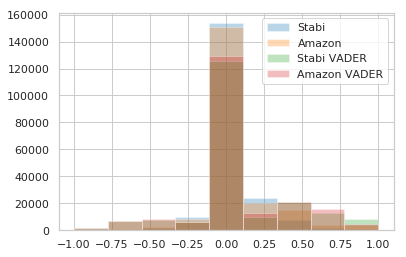

In [25]:
# create bins ranging from -1 to 1 in 10 steps
bins = np.linspace(-1, 1, 10)
# plot all histograms
plt.hist(df3["sentiment_polarity"],bins,alpha=0.3, label='Stabi')
plt.hist(df2["sentiment_polarity"],bins,alpha=0.3, label='Amazon')
plt.hist(df3["sentiment_polarity_VADER"],bins,alpha=0.3, label='Stabi VADER')
plt.hist(df2["sentiment_polarity_VADER"],bins,alpha=0.3, label='Amazon VADER')
plt.legend(loc='upper right')
plt.show()

This plot is confusing. Hence, we will compare the TextBlob and VADER runs separated by dataset. Subplots are a handy means to get more control over the layout and the plotting.

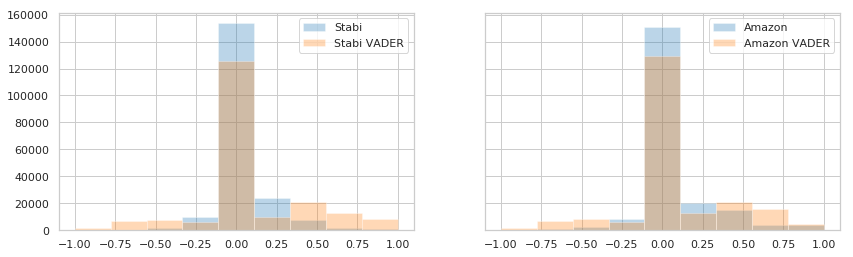

In [26]:
# create a subplot environment with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
# axs[0] indicates the first columns and behaves as plt. used above
axs[0].hist(df3["sentiment_polarity"],bins,alpha=0.3, label='Stabi')
axs[0].hist(df3["sentiment_polarity_VADER"],bins,alpha=0.3, label='Stabi VADER')
axs[0].legend(loc='upper right')

axs[1].hist(df2["sentiment_polarity"],bins,alpha=0.3, label='Amazon')
axs[1].hist(df2["sentiment_polarity_VADER"],bins,alpha=0.3, label='Amazon VADER')
axs[1].legend(loc='upper right')
plt.show()

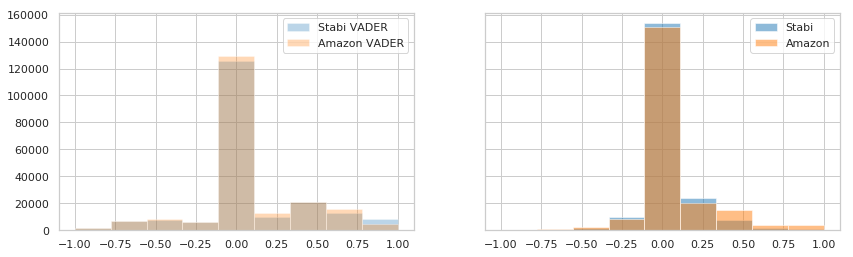

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
# plot all histograms
axs[0].hist(df3["sentiment_polarity_VADER"],bins,alpha=0.3, label='Stabi VADER')
axs[0].hist(df2["sentiment_polarity_VADER"],bins,alpha=0.3, label='Amazon VADER')
axs[0].legend(loc='upper right')

axs[1].hist(df3["sentiment_polarity"],bins,alpha=0.5, label='Stabi')
axs[1].hist(df2["sentiment_polarity"],bins,alpha=0.5, label='Amazon')
axs[1].legend(loc='upper right')
plt.show()

Interestingly, the VADER algorithm shows that the titles of both datasets are less neutral. According to VADER, the dataset has a bias towards positive titles. At the same time, even more negative titles are present.

To give an example, we will take a look at the most negative media from Amazon as judged by VADER:

In [28]:
df2[(df2.sentiment_polarity_VADER==df2.sentiment_polarity_VADER.min())].head()

,0,3,sentiment_polarity,sentiment_subjectivity,sentiment_polarity_VADER
108243,1507845006,"How to Stop Lying: The Ultimate Cure Guide for Pathological Liars and Compulsive Liars (Pathological Lying Disorder, Compulsive Lying Disorder, ASPD, ... Disorder, Psychopathy, Sociopathy)",0.0,1.0,-0.9783


In [29]:
df3[(df3.sentiment_polarity_VADER==df3.sentiment_polarity_VADER.min())].head()

,ppn,title,sentiment_polarity,sentiment_subjectivity,sentiment_polarity_VADER
1028725,0733085598,"God's dreadful judgments, on wicked and prophane swearers Or, Fair warning to murderers, swearers, or jealous persons of either sex. A full and true account of one John Chambers of the town of Simer in the county of York who was hanged on the 6th...",0.12625,0.624583,-0.9925


## Conclusion

The tutorial illustrates very well that the outcome of a sentiment analysis depends heavily on the used algorithm or methodology. As there are different algorithms available with a varying quality regarding their underlying lexica or ground truths, it is not easy to give a general recommendation which algorithm will serve you best.